### 5.5.3 다중 분류의 평가 지표
- 다중클래스 분류문제에서 불균형 데이터에 대해서 Accuracy(정확도) 지표는 좋은 지표가 되지 못함.
  - 훈련 샘플 비율
    - A 클래스: 85%
    - B 클래스: 10%
    - C 클래스: 5%
  - 실제 새로운 데이터도 위와 같은 비율로 출현한다고 하면 아무런 학습이 안된 모델 (Dummy Model)도 85% 정확도를 산출할 수 있음.

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print()
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


- 다중 클래스 예측 결과에 대한 confusion matrix 
  - 행: 정답 레이블
  - 열: 예측 레이블
- 위 confusion matrix 해석
  - 클래스 0에 대해서는 거짓 음성(FN)이 없음
    - 첫번째 행(예측 레이블 행)에서 다른 항목들이 모두 0
  - 클래스 0에 대해서는 거짓 양성(FP)이 없음
    - 첫번째 열(정답 레이블 열)에서 다른 항목들이 모두 0

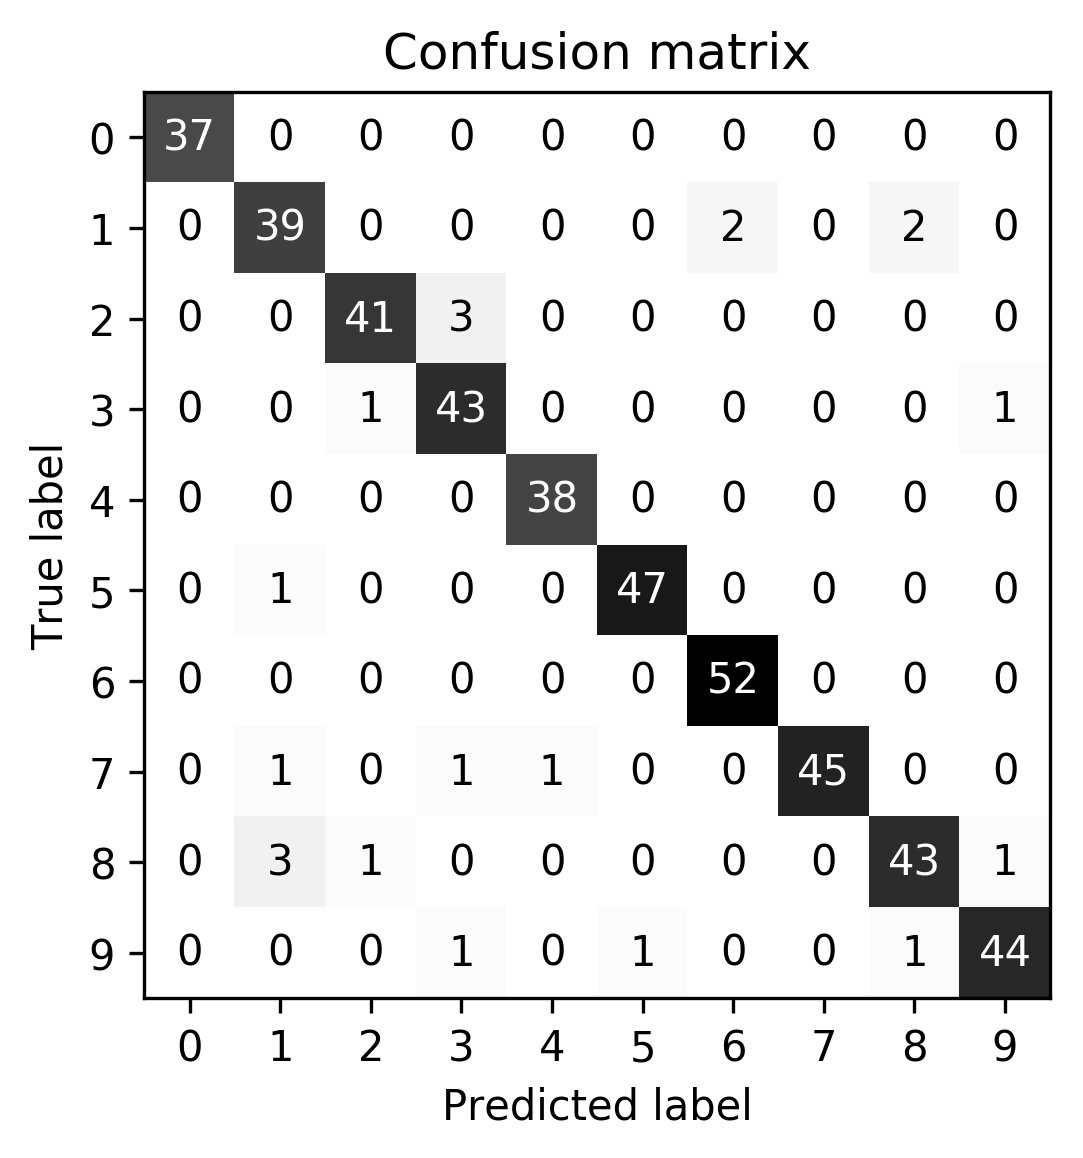

In [6]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")

plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



- 관심있는 클래스를 양성, 그 외의 모든 클래스는 음성으로 두고 precision, recall, f1-score 계산
- 클래스 0에 대해서는 오류가 없으므로 precision, recall, f1-score 모두 1.0 
- 클래스 7은 거짓 양성(8번째 열)이 없음
  - FP가 0
    - 클래스 7에 대한 precision = (TP / (TP + FP)) = 1.0
- 클래스 7은 거짓 음성(8번재 행)에 3개 있음
  - FN이 3
    - 클래스 7에 대한 recall = (TP /a (TP + FN)) = 45 / 48 = 0.94

- [NOTE] 다중 분류에서 불균형 데이터셋을 위해 가장 많이 사용되는 지표는 f1-score
- 클래스별로 f1-score를 산출한 이후, 전체 클래스에 대한 평균 f1-score 산출 전략 (다중 클래스일 때 반드시 하나를 제시해야 함)
  - macro 평균
    - 클래스별 f1-score에 가중치를 고려하지 않음
  - weighted 평균 (보통은 이것을 선택)
    - 클래스별 테스트 데이터 샘플 수로 가중치를 두어 f1-score 계산 (classification_report에 노출되는 값)
  - micro 평균
    - 모든 클래스별로 FP, FN, TP의 총 수를 헤아린 다음 산출

In [10]:
from sklearn.metrics import f1_score
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

print("Weighted average f1 score: {:.3f}".format(f1_score(y_test, pred, average="weighted")))

print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))

Macro average f1 score: 0.954
Weighted average f1 score: 0.953
Micro average f1 score: 0.953


### 5.3.5 모델 선택에서 평가 지표 사용하기

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# default scoring for classification is accuracy
print("Default scoring: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [ 0.9  0.9  0.9]
Explicit accuracy scoring: [ 0.9  0.9  0.9]
AUC scoring: [ 0.994  0.99   0.996]


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000


In [17]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']
